In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Column Descriptions
- The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
- store_nbr identifies the store at which the products are sold.
- family identifies the type of product sold.
- sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
- onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.


In [2]:
# Parasing dates in pandas 
# Format: YYYY-MM-DD HH:MM:SS
df = pd.read_csv('train.csv', index_col='date', parse_dates=['date'])

### Setting up the date to be a correct format for datetime
- The date column is in the format of YYYY-MM-DD
- We need to convert it to a datetime format so that we can use it for our time series analysis
- We will use the pandas **to_datetime** function to convert the date column to a datetime format


In [3]:
df

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0
2013-01-01,1,1,BABY CARE,0.000,0
2013-01-01,2,1,BEAUTY,0.000,0
2013-01-01,3,1,BEVERAGES,0.000,0
2013-01-01,4,1,BOOKS,0.000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,9,PRODUCE,2419.729,148


In [4]:
# 5 Column Names
df.columns

Index(['id', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [5]:
# As we can see here, the date column is now a datetime object, there are 5 columns and 3_000_888 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [6]:
sales_dtypes = df['sales'].apply(type)
print(sales_dtypes.value_counts())

sales
<class 'float'>    3000888
Name: count, dtype: int64


In [7]:
onpromotion_dtype = df['onpromotion'].apply(type)
print(onpromotion_dtype.value_counts())

onpromotion
<class 'int'>    3000888
Name: count, dtype: int64


In [17]:
# Define the start and end dates
start_date = df.index.min().strftime('%Y-%m-%d')
end_date = df.index.max().strftime('%Y-%m-%d')

# Create a time step with a frequency of 1 day
time_step = pd.date_range(start=start_date, end=end_date, freq='D')
time_step_mapped = np.arange(len(time_step))

# Create a dictionary with time step as keys and mapped values
time_dict = dict(zip(time_step, time_step_mapped))

# Apply the time step dictionary to the dataframe
df['Time'] = df.index.map(time_dict)

df['Time']

date
2013-01-01       0
2013-01-01       0
2013-01-01       0
2013-01-01       0
2013-01-01       0
              ... 
2017-08-15    1687
2017-08-15    1687
2017-08-15    1687
2017-08-15    1687
2017-08-15    1687
Name: Time, Length: 3000888, dtype: int32

In [18]:
df.head()

,id,store_nbr,family,sales,onpromotion,Time
date,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,0
2013-01-01,1,1,BABY CARE,0.0,0,0
2013-01-01,2,1,BEAUTY,0.0,0,0
2013-01-01,3,1,BEVERAGES,0.0,0,0
2013-01-01,4,1,BOOKS,0.0,0,0


### Time Step Feature Engineering

Text(0.5, 1.0, 'Time Plot of sales')

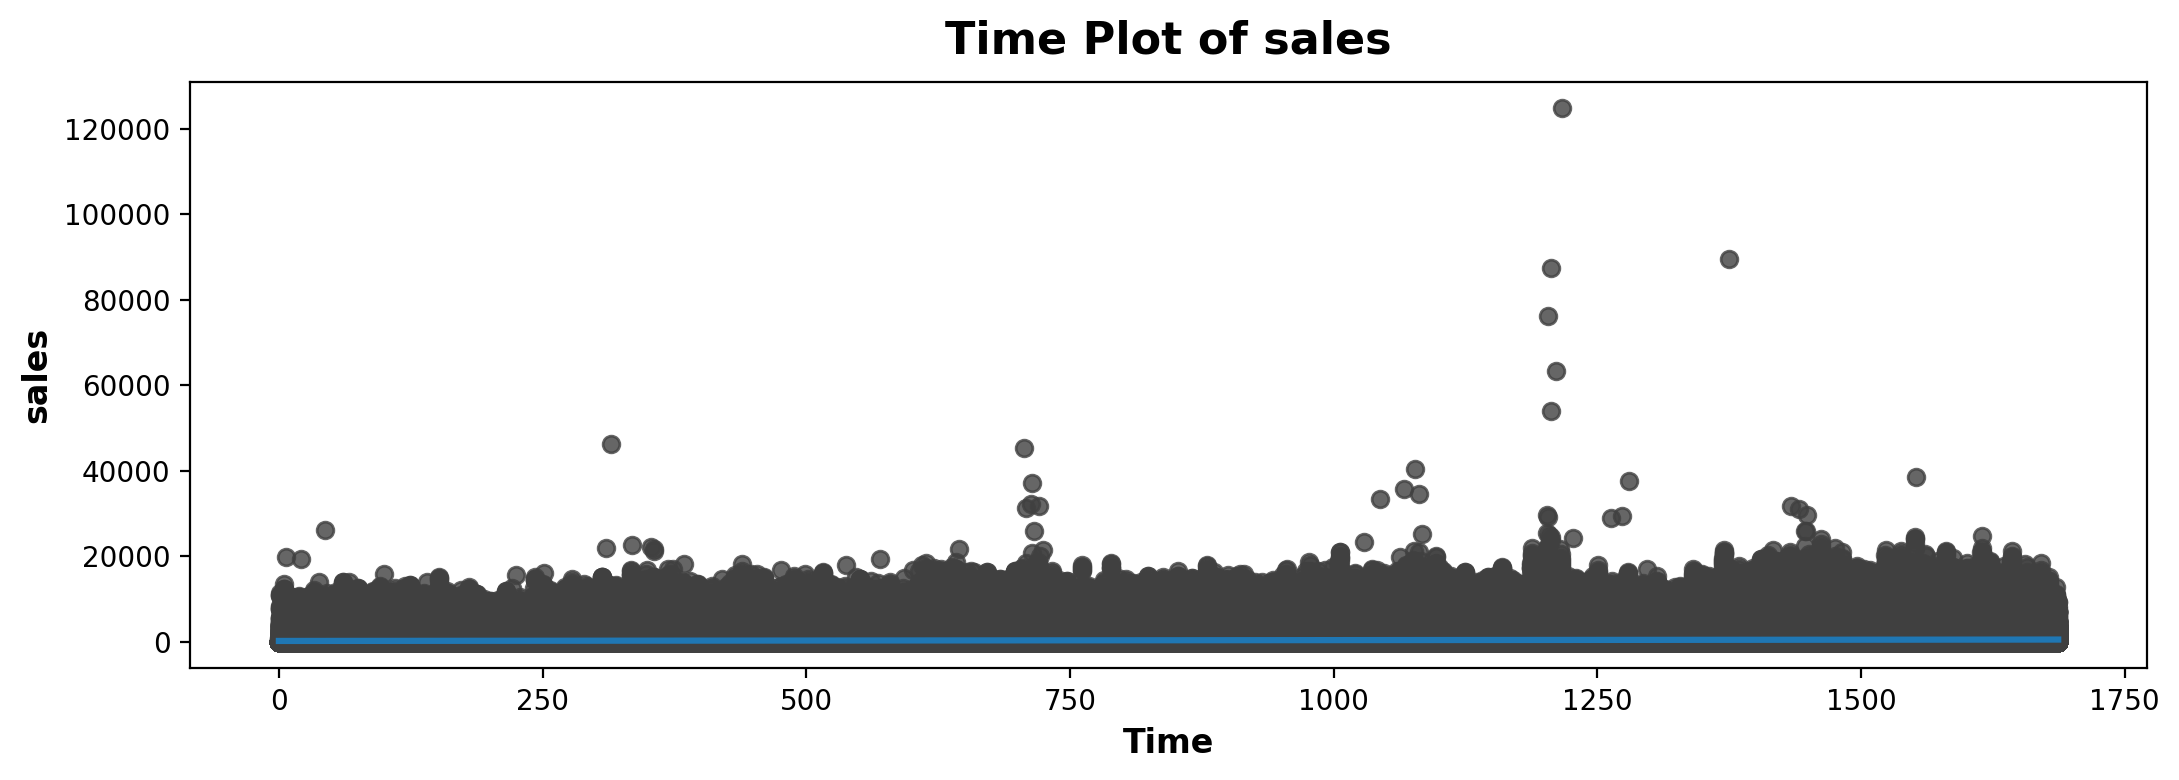

In [19]:
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
# ax.plot(df['Time'].iloc[:50], df['sales'].iloc[:50], color='0.75')
ax = sns.regplot(x=df['Time'], y=df['sales'], ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of sales')